In [28]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import keras.preprocessing.image as process_im
from PIL import Image
import tensorflow_hub as hub
from keras.models import Model
import tensorflow as tf
from google.colab import drive

In [29]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
pre_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [31]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [32]:
def convert_webp_to_jpeg(input_path, output_path):
    image = Image.open(input_path)
    image.save(output_path, 'JPEG')

convert_webp_to_jpeg('/content/drive/MyDrive/Dashtoons/ai/Mona-Lisa-oil-wood-panel-Leonardo-da.webp', '/content/drive/MyDrive/Dashtoons/ai/Mona-Lisa.jpg')
convert_webp_to_jpeg('/content/drive/MyDrive/Dashtoons/ai/Starry-Night-canvas-Vincent-van-Gogh-New-1889.webp', '/content/drive/MyDrive/Dashtoons/ai/Starry-Night.jpg')

In [33]:
content_img = load_image('/content/drive/MyDrive/Dashtoons/ai/Mona-Lisa.jpg')
style_img = load_image('/content/drive/MyDrive/Dashtoons/ai/Starry-Night.jpg')

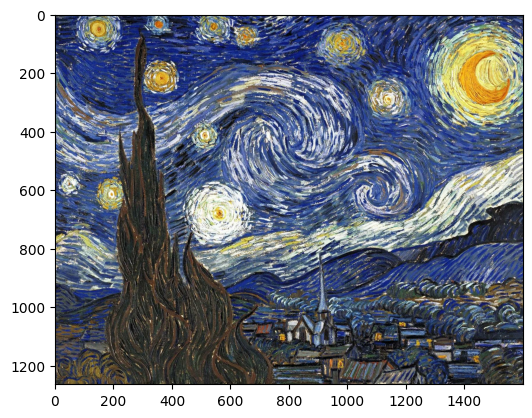

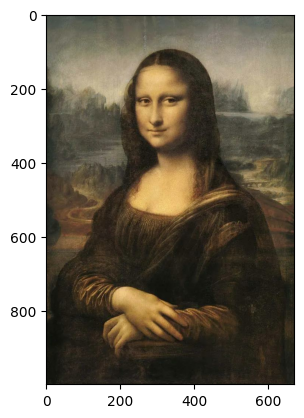

In [38]:
plt.imshow(np.squeeze(style_img))
plt.show()
plt.imshow(np.squeeze(content_img))
plt.show()

In [35]:
stylized_img = pre_model(tf.constant(content_img), tf.constant(style_img))[0]

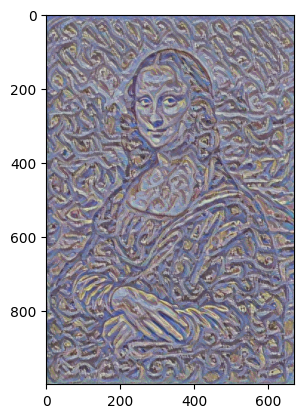

In [36]:
plt.imshow(np.squeeze(stylized_img))
plt.show()